<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1679]:
import pandas as pd

In [1681]:
data_info = pd.read_csv("C:/Users/Georgios/Desktop/Deep learning, Keras Project/DATA/lending_club_info.csv",index_col='LoanStatNew')

In [1683]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [1685]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [1687]:
feat_info('loan_status')

Current status of the loan


## Loading the data and other imports

In [1690]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [1692]:
df = pd.read_csv('C:/Users/Georgios/Desktop/Deep learning, Keras Project/DATA/lending_club_loan_two.csv')

In [1693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [1696]:
# CODE HERE

<Axes: xlabel='loan_status', ylabel='count'>

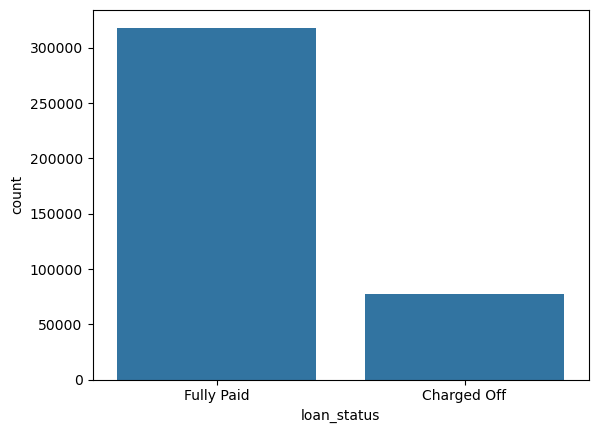

In [1697]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

In [1702]:
# CODE HERE

<Axes: xlabel='loan_amnt', ylabel='Count'>

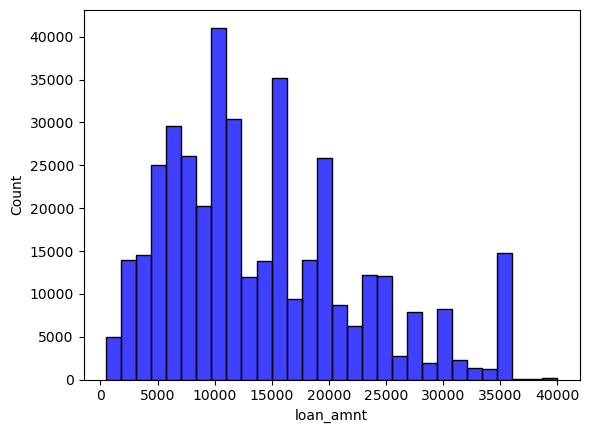

In [1704]:
sns.histplot(df['loan_amnt'], bins=30, color='blue')

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [1707]:
# CODE HERE

In [1708]:
corr = df.corr(numeric_only=True)
print(corr)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [1713]:
# CODE HERE

(10.0, 0.0)

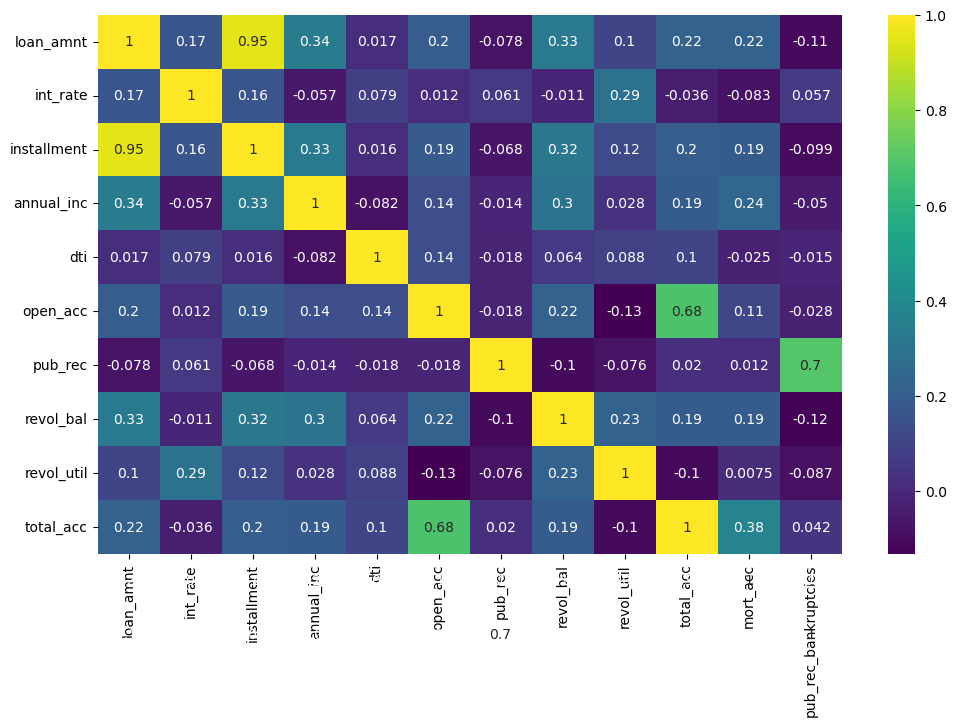

In [1715]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.ylim(10, 0)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [1718]:
# CODE HERE

In [1720]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [1722]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

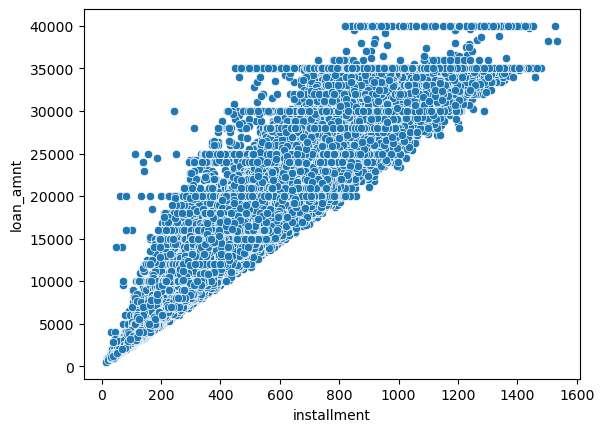

In [1724]:
sns.scatterplot(data=df, x="installment", y="loan_amnt")

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [1727]:
# CODE HERE

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

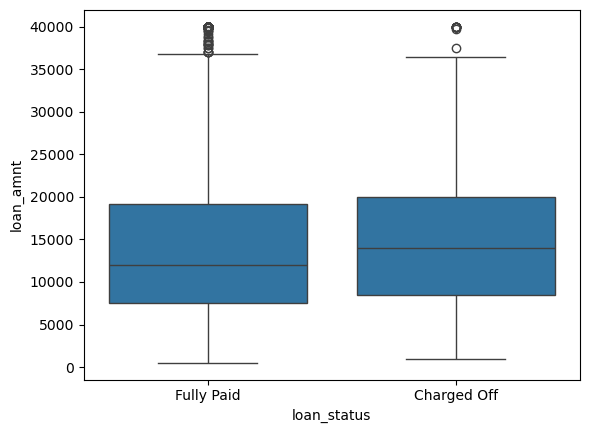

In [1729]:
sns.boxplot(data=df, x="loan_status", y="loan_amnt")

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [1732]:
# CODE HERE

In [1734]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [1737]:
# CODE HERE

In [1739]:
sorted(df['grade'].unique().tolist())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [1741]:
sorted(df['sub_grade'].unique().tolist())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [1744]:
# CODE HERE

<Axes: xlabel='grade', ylabel='count'>

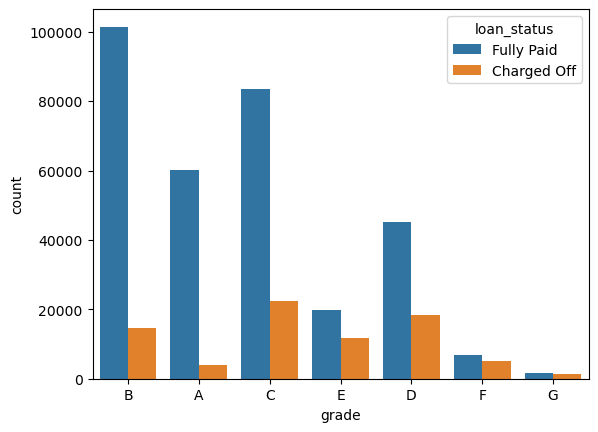

In [1746]:
sns.countplot(x='grade',hue='loan_status',data=df)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [1748]:
#CODE HERE

C:\Users\Georgios\AppData\Local\Temp\ipykernel_6172\3746550130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order=order, palette="coolwarm")


<Axes: xlabel='sub_grade', ylabel='count'>

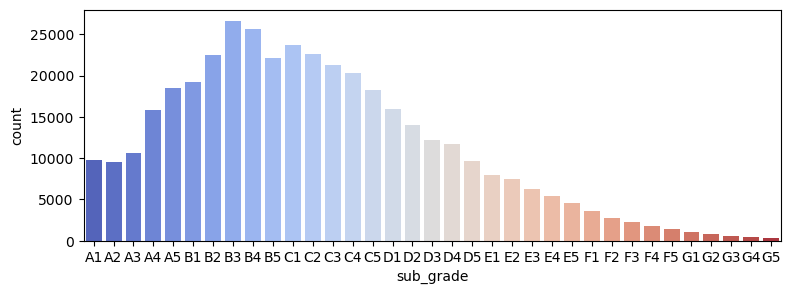

In [1751]:
plt.figure(figsize=(9,3))
order = sorted(df["sub_grade"].unique().tolist(), reverse=False)
sns.countplot(x='sub_grade',data=df,order=order, palette="coolwarm")

In [1752]:
# CODE HERE

<Axes: xlabel='sub_grade', ylabel='count'>

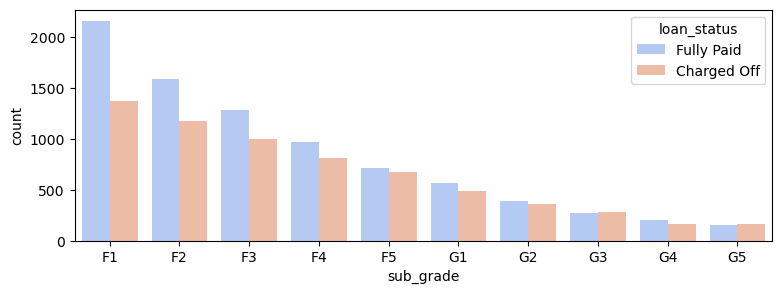

In [1755]:
plt.figure(figsize=(9,3))
df_filtered = df[df["sub_grade"].str.startswith(("F", "G"))]
order = sorted(df_filtered["sub_grade"].unique().tolist())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=order, palette="coolwarm")

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [1758]:
# CODE HERE

<Axes: xlabel='sub_grade', ylabel='count'>

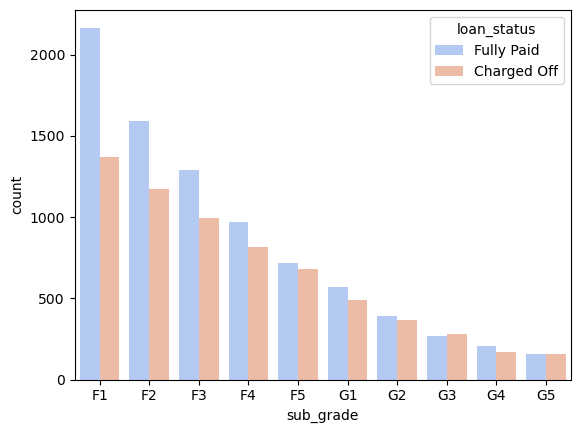

In [1760]:
df_filtered = df[df["grade"].isin(["F", "G"])]
order = sorted(df_filtered["sub_grade"].unique().tolist(), reverse=False)
sns.countplot(x='sub_grade',data=df_filtered,hue='loan_status',order=order, palette="coolwarm")

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [1763]:
# CODE HERE

In [1765]:
df["loan_repaid"] = df["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else (0 if x == "Charged Off" else x))

In [1767]:
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [1770]:
#CODE HERE

In [1772]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')


In [1774]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include="number").columns

In [1776]:
numeric_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

In [1778]:
# Compute correlations with 'loan_repaid' and drop itself
corr_with_target = df[numeric_cols].corr()["loan_repaid"].drop("loan_repaid")

C:\Users\Georgios\AppData\Local\Temp\ipykernel_6172\2557494171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'int_rate'),
  Text(1, 0, 'revol_util'),
  Text(2, 0, 'dti'),
  Text(3, 0, 'loan_amnt'),
  Text(4, 0, 'installment'),
  Text(5, 0, 'open_acc'),
  Text(6, 0, 'pub_rec'),
  Text(7, 0, 'pub_rec_bankruptcies'),
  Text(8, 0, 'revol_bal'),
  Text(9, 0, 'total_acc'),
  Text(10, 0, 'annual_inc'),
  Text(11, 0, 'mort_acc')])

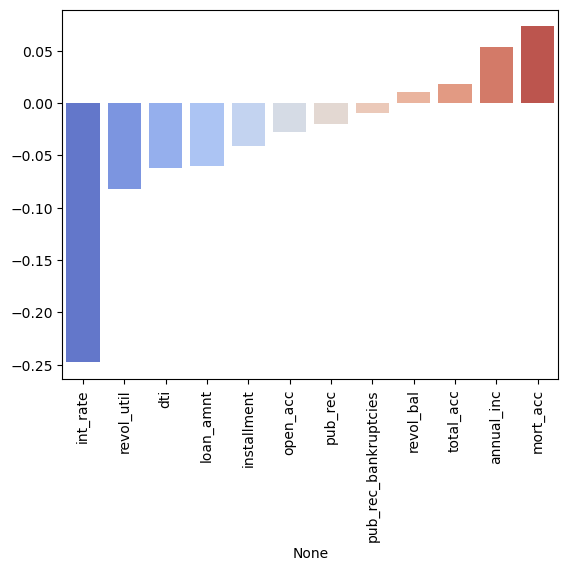

In [1780]:

# Sort correlations from negative to positive
corr_with_target = corr_with_target.sort_values()

# Plot as barplot
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")
# Rotate x-axis labels vertically
plt.xticks(rotation=90)

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [1783]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [1787]:
# CODE HERE

In [1789]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [1792]:
# CODE HERE

In [1794]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [1797]:
# CODE HERE

In [1799]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [1802]:
# CODE HERE

In [1804]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [1807]:
# CODE HERE

In [1809]:
df['emp_title'].nunique()

173105

In [1811]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [1814]:
# CODE HERE

In [1816]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [1819]:
# CODE HERE

In [1821]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [1823]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

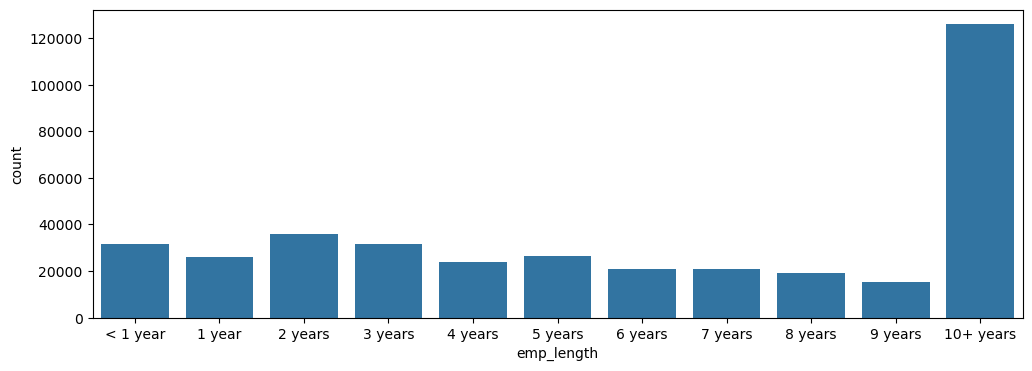

In [1825]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [1827]:
# CODE HERE

<Axes: xlabel='emp_length', ylabel='count'>

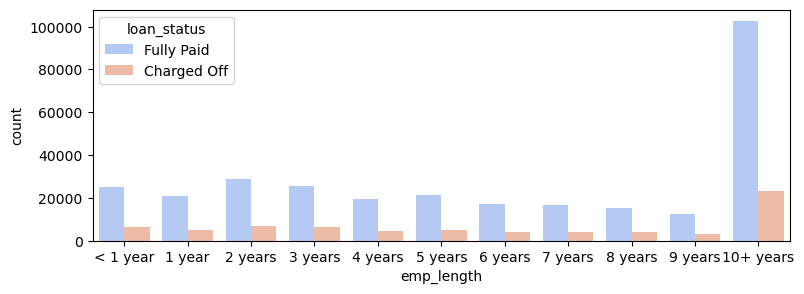

In [1828]:
plt.figure(figsize=(9,3))
sns.countplot(x='emp_length', data=df, palette="coolwarm",order=emp_length_order , hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [1832]:
# CODE HERE

In [1833]:
# Step 1: Group by employment length and loan_status, count
counts = df.groupby(['emp_length','loan_status']).size().unstack(fill_value=0)

In [1834]:
# Step 2: Calculate percentage of "Charged Off"
counts['charged_off_pct'] = counts['Charged Off'] / counts['Fully Paid']

In [1835]:
print(counts[['charged_off_pct']])

loan_status  charged_off_pct
emp_length                  
1 year              0.248649
10+ years           0.225770
2 years             0.239560
3 years             0.242593
4 years             0.238213
5 years             0.237911
6 years             0.233341
7 years             0.241887
8 years             0.249625
9 years             0.250735
< 1 year            0.260830


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '1 year'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '< 1 year')])

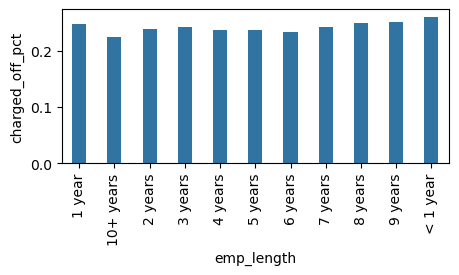

In [1837]:
# Step 3: Plot using Seaborn
plt.figure(figsize=(5,2))
sns.barplot(
    x='emp_length', 
    y='charged_off_pct', 
    data=counts,
    width=0.4 
)
plt.xticks(rotation=90)

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [1844]:
# CODE HERE

In [1846]:
df = df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [1849]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [1852]:
# CODE HERE

In [1854]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [1856]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [1859]:
# CODE HERE

In [1861]:
df = df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [1864]:
# CODE HERE

In [1866]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [1869]:
# CODE HERE

In [1871]:
df['mort_acc'].value_counts(dropna=False)

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
NaN      37795
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [1874]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [1876]:
numeric_cols = df.select_dtypes(include='number')
corr_with_mort_acc = numeric_cols.corr()['mort_acc'].sort_values()
print(corr_with_mort_acc)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [1879]:
print("Mean of mort_acc column per total_acc")
mort_acc_means = df.groupby('total_acc')['mort_acc'].mean()
print(mort_acc_means)

Mean of mort_acc column per total_acc
total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [1882]:
# CODE HERE

In [1884]:
def fill_mort_acc(row):
    if pd.isna(row['mort_acc']):
        # Fill with mean corresponding to that total_acc
        return mort_acc_means[row['total_acc']]
    else:
        return row['mort_acc']

In [1886]:
df['mort_acc'] = df.apply(fill_mort_acc, axis=1)

In [1887]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [1889]:
# CODE HERE

In [1890]:
df = df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])
# or df = df.dropna() while only those columns are null

In [1891]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [1893]:
# CODE HERE

In [1894]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [1896]:
# CODE HERE

In [1897]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [1898]:
df['term'] = df['term'].apply(lambda x: int(x.strip().replace(' months','')))

In [1899]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [1903]:
# CODE HERE

In [1909]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [1916]:
# CODE HERE

In [1917]:
# Convert sub_grade into dummy variables
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [1919]:
# Concatenate back to original DataFrame
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [1923]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [1925]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [1928]:
# CODE HERE

In [1930]:
verification_status_dummies = pd.get_dummies(df['verification_status'], drop_first=True)
application_type_dummies = pd.get_dummies(df['application_type'], drop_first=True)
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'], drop_first=True)
purpose_dummies = pd.get_dummies(df['purpose'], drop_first=True)

In [1932]:
df = pd.concat([df.drop('verification_status', axis=1), verification_status_dummies], axis=1)
df = pd.concat([df.drop('application_type', axis=1), application_type_dummies], axis=1)
df = pd.concat([df.drop('initial_list_status', axis=1), initial_list_status_dummies], axis=1)
df = pd.concat([df.drop('purpose', axis=1), purpose_dummies], axis=1)
""" or 
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
"""

" or \ndummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)\ndf = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)\ndf = pd.concat([df,dummies],axis=1)\n"

In [1934]:
df.head(7)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,False,False,False,False,False,False,False,False,False,False
5,20000.0,36,13.33,677.07,MORTGAGE,86788.0,Sep-2015,Fully Paid,16.31,Jan-2005,...,False,False,False,False,False,False,False,False,False,False
6,18000.0,36,5.32,542.07,MORTGAGE,125000.0,Sep-2015,Fully Paid,1.36,Aug-2005,...,True,False,False,False,False,False,False,False,False,False


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [1937]:
#CODE HERE

In [1939]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [1942]:
#CODE HERE

In [1944]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [1946]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [1948]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), home_ownership_dummies], axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [1951]:
#CODE HERE

In [1953]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [1956]:
zip_code_dummies = pd.get_dummies(df['zip_code'], drop_first=True)
# concat the dummies and drop the zip_code
df = pd.concat([df.drop('zip_code', axis=1), zip_code_dummies], axis=1)

In [1958]:
# drop adress
df = df.drop(['address'],axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [1961]:
#CODE HERE

In [1963]:
df = df.drop(['issue_d'],axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [1966]:
#CODE HERE

In [1968]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df.drop('earliest_cr_line', axis=1, inplace=True)

In [1970]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [1972]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,True,False,False,False,False,False,False,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,True,False,False,False,False,False,False,False,False,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,True,False,False,False,False,False,False,False,False,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,True,False,False,False,False,False,False,False,1999


## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [1975]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [1978]:
# CODE HERE

In [1980]:
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [1983]:
#CODE HERE

In [1985]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid']

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [1988]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [1991]:
#CODE HERE

In [1993]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [1996]:
# CODE HERE

In [1998]:
from sklearn.preprocessing import MinMaxScaler

In [2000]:
scaler = MinMaxScaler()

In [2002]:
X_train_scaled = scaler.fit_transform(X_train)

In [2003]:
X_test_scaled = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [2006]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import class_weight
from collections import Counter

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [2009]:
# CODE HERE
model = Sequential()

# ------------------------------
#  Apply SMOTE to training data
# ------------------------------
print("Original dataset shape %s" % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Resampled dataset shape %s" % Counter(y_train_res))

# ------------------------------
#  Scale features
# ------------------------------
scaler = MinMaxScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
#  Build the neural network
# ------------------------------
model = Sequential([
    Input(shape=(X_train_res.shape[1],)),  # define input layer
    Dense(78, activation='relu'),
    Dropout(0.2),
    Dense(39, activation='relu'),
    Dropout(0.2),
    Dense(19, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

Original dataset shape Counter({1: 222493, 0: 54160})
Resampled dataset shape Counter({0: 222493, 1: 222493})


**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [2012]:
# CODE HERE

In [2014]:
#convert to float32, to change the boolean True/False to 0,1
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [2015]:
# ------------------------------
# Train the model with early stopping
# ------------------------------
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# ------------------------------
# Compute class weights (optional but helps with test imbalance)
# ------------------------------
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_res),
    y=y_train_res
)
class_weight_dict = dict(enumerate(class_weights_values))
print("Class weights:", class_weight_dict)


history = model.fit(
    X_train_res,
    y_train_res,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

Class weights: {0: 1.0, 1: 1.0}
Epoch 1/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4971 - val_loss: 0.4206
Epoch 2/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3564 - val_loss: 0.3397
Epoch 3/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2888 - val_loss: 0.3113
Epoch 4/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2502 - val_loss: 0.2895
Epoch 5/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2280 - val_loss: 0.2791
Epoch 6/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2150 - val_loss: 0.2752
Epoch 7/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.2069 - val_loss: 0.2711
Epoch 8/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2007 - val_loss: 0.2703
Epoch 9/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1968 - val_loss: 0.2669
Epoch 10/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1941 - val_loss: 0.2664
Epoch 11/50
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1913 - val_loss: 0.2

**TASK: OPTIONAL: Save your model.**

In [392]:
# CODE HERE

In [2018]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('full_data_project_model.h5')
model = load_model("full_data_project_model.h5")

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [2028]:
# CODE HERE

In [2030]:
losses = pd.DataFrame(history.history)

In [2032]:
losses

,loss,val_loss
0,0.497138,0.420552
1,0.356418,0.339721
2,0.288777,0.311272
3,0.250206,0.289531
4,0.227968,0.279053
5,0.214968,0.275182
6,0.206873,0.271111
7,0.200730,0.270277
8,0.196848,0.266918
9,0.194081,0.266426


<Axes: ylabel='Loss'>

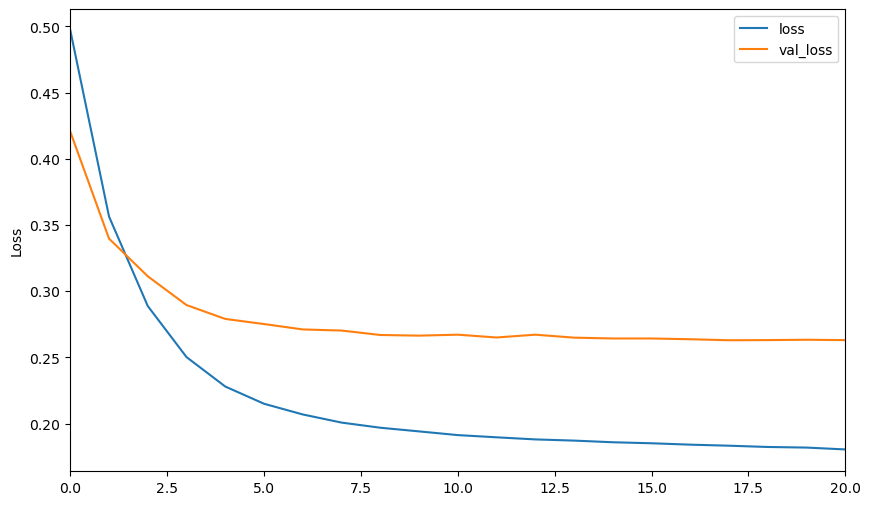

In [2034]:
losses[['loss','val_loss']].plot(figsize=(10,6), xlim=(0, 20), ylabel='Loss')


**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [2036]:
# CODE HERE

In [2038]:
from sklearn.metrics import classification_report,confusion_matrix

In [2042]:
# ------------------------------
# Evaluate and calculate F1-score
# ------------------------------
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.6).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-score class 0: {f1_class_0:.4f}")
print(f"F1-score class 1: {f1_class_1:.4f}")

3706/3706 ━━━━━━━━━━━━━━━━━━━━ 3s 799us/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.55      0.64     23363
         1.0       0.90      0.96      0.93     95203

    accuracy                           0.88    118566
   macro avg       0.84      0.75      0.79    118566
weighted avg       0.87      0.88      0.87    118566

F1-score class 0: 0.6434
F1-score class 1: 0.9281


In [2046]:
confusion_matrix(y_test,y_pred)

array([[12798, 10565],
       [ 3622, 91581]], dtype=int64)

In [2149]:
#This result is expected, since 20% of the dataset corresponds to charged-off loans while 80% corresponds to repaid loans. 
#Therefore, the F1 score for the minority class (charged-off) is relatively low, which can be attributed to the class imbalance in the dataset.

**TASK: Given the customer below, would you offer this person a loan?**

In [ ]:
import random
random_ind = random.randint(0,len(df) - 1)
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]

In [ ]:
new_customer

In [2509]:
# CODE HERE

In [2511]:
new_customer_scaled = scaler.transform(new_customer.values.reshape(1, -1))

In [2513]:
predictions = model.predict(new_customer_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [2515]:
predicted_class = int(predictions > 0.6)  # class 1 only if probability >= 0.7
predicted_class

C:\Users\Georgios\AppData\Local\Temp\ipykernel_6172\756784682.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions > 0.6)  # class 1 only if probability >= 0.7


0

**TASK: Now check, did this person actually end up paying back their loan?**

In [2519]:
#df.iloc[random_ind]['loan_repaid']
df.iloc[random_ind]['loan_repaid']

0

**get all the customer with load_prepaid 0 and test our model**

In [2145]:
# Get all borrowers with loan_repaid = 0
charged_off_customers = df[df['loan_repaid'] == 0]

# Drop the target column if it's included
X_charged_off = charged_off_customers.drop(columns=['loan_repaid'])
X_charged_off_scaled = scaler.transform(X_charged_off)
# Predict probabilities
y_pred_proba = model.predict(X_charged_off_scaled)

# Convert probabilities to 0 or 1 using threshold 0.5
y_pred = (y_pred_proba > 0.7).astype(int)
charged_off_customers = charged_off_customers.copy()  # to avoid modifying original df
charged_off_customers['predicted'] = y_pred
# Count how many were predicted as 0 or 1
print(charged_off_customers['predicted'].value_counts())

C:\Users\Georgios\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


2423/2423 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step
predicted
0    51324
1    26199
Name: count, dtype: int64


In [2139]:
new_customer = df.drop('loan_repaid', axis=1).iloc[4]
new_customer_scaled = scaler.transform(new_customer.values.reshape(1, -1))
predictions_0 = model.predict(new_customer_scaled)
predicted_class = int(predictions_0 > 0.7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\Georgios\AppData\Local\Temp\ipykernel_6172\1560953206.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions_0 > 0.7)


In [2141]:
predicted_class = int(predictions_0 > 0.7) 

C:\Users\Georgios\AppData\Local\Temp\ipykernel_6172\4121232084.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions_0 > 0.7)


In [2143]:
predicted_class

0

**get all the customer with load_prepaid 1 and test our model**

In [895]:
# Get all borrowers with loan_repaid = 1
re_paid_customers = df[df['loan_repaid'] == 1]

# Drop the target column if it's included
X_re_paid = re_paid_customers.drop(columns=['loan_repaid'])
X_re_paid_scaled = scaler.transform(X_re_paid)
# Predict probabilities
y_pred_proba = model.predict(X_re_paid_scaled)

# Convert probabilities to 0 or 1 using threshold 0.5
y_pred = (y_pred_proba > 0.7).astype(int)
re_paid_customers = re_paid_customers.copy()  # to avoid modifying original df
re_paid_customers['predicted'] = y_pred
# Count how many were predicted as 0 or 1
print(re_paid_customers['predicted'].value_counts())

# See first few rows
re_paid_customers.head()

C:\Users\Georgios\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


9928/9928 ━━━━━━━━━━━━━━━━━━━━ 8s 807us/step
predicted
1    292544
0     25152
Name: count, dtype: int64


,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year,predicted
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,False,True,False,False,False,False,False,False,1990,1
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,False,False,False,False,False,False,False,False,2004,1
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,False,False,False,False,False,False,False,False,2007,1
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,False,False,False,False,False,False,False,False,2006,1
5,20000.0,36,13.33,677.07,86788.0,16.31,8.0,0.0,25757.0,100.6,...,False,False,False,True,False,False,False,False,2005,1


# GREAT JOB!